In [2]:
# Import libraries
import numpy as np # For numerical operations
import pandas as pd  # For handling datasets in tabular format
from sklearn.datasets import load_iris # To load the Iris dataset
from sklearn.model_selection import train_test_split   # For splitting dataset into train and test
from sklearn.preprocessing import StandardScaler, LabelBinarizer  # For scaling features & one-hot encoding target labels
import tensorflow as tf # TensorFlow library for deep learning
from tensorflow.keras.models import Sequential# Sequential model to stack layers
from tensorflow.keras.layers import Dense# Dense (fully connected) layers

In [3]:
data=pd.read_csv('/content/mobile_price_classification.csv')
data

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
data.isnull().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [5]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


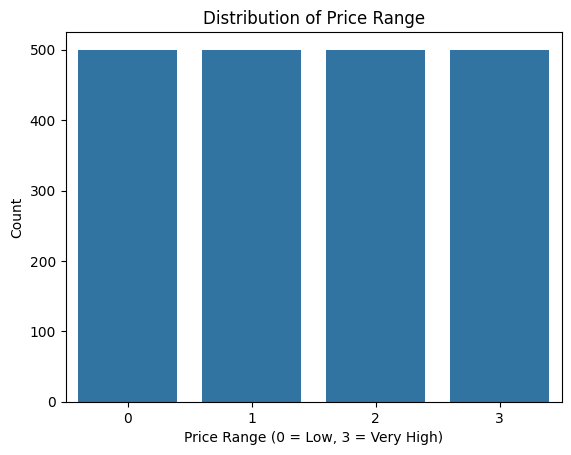

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='price_range', data=data)
plt.title("Distribution of Price Range")
plt.xlabel("Price Range (0 = Low, 3 = Very High)")
plt.ylabel("Count")
plt.show()


In [8]:
# features
X = data.drop('price_range', axis=1)

# target
y = data['price_range']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2000, 20)
Shape of y: (2000,)


In [9]:
# Split into training and testing data (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y)




In [11]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train


array([[-1.13564029,  1.03528895,  1.09065073, ..., -1.74445599,
         0.98412598, -1.01884419],
       [-1.05624572,  1.03528895, -0.38165414, ...,  0.57324462,
        -1.01613007, -1.01884419],
       [ 1.18948645, -0.96591391, -1.11780657, ...,  0.57324462,
         0.98412598, -1.01884419],
       ...,
       [ 0.57020879, -0.96591391,  0.72257451, ...,  0.57324462,
        -1.01613007,  0.98150435],
       [ 0.00537312, -0.96591391,  0.10911415, ..., -1.74445599,
        -1.01613007,  0.98150435],
       [ 0.06435195, -0.96591391,  1.33603487, ...,  0.57324462,
         0.98412598,  0.98150435]])

In [12]:
# Building ANN
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))   # 4 output classes

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   # correct for integer labels
    metrics=['accuracy']
)




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train ANN
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)



Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2427 - loss: 1.4037 - val_accuracy: 0.4233 - val_loss: 1.2661
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4722 - loss: 1.2191 - val_accuracy: 0.6000 - val_loss: 1.0926
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5895 - loss: 1.0176 - val_accuracy: 0.6900 - val_loss: 0.8883
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7365 - loss: 0.7993 - val_accuracy: 0.7300 - val_loss: 0.7194
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8032 - loss: 0.6494 - val_accuracy: 0.7933 - val_loss: 0.5932
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8449 - loss: 0.5192 - val_accuracy: 0.8067 - val_loss: 0.5067
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8777 - loss: 0.4196 - val_accuracy: 0.8500 - val_loss: 0.4334
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9193 - loss: 0.3612 - val_accuracy: 0.8633 - val_loss:

In [14]:
# 8. Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.91


In [15]:
loss

0.23504440486431122

In [16]:
acc

0.9120000004768372

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


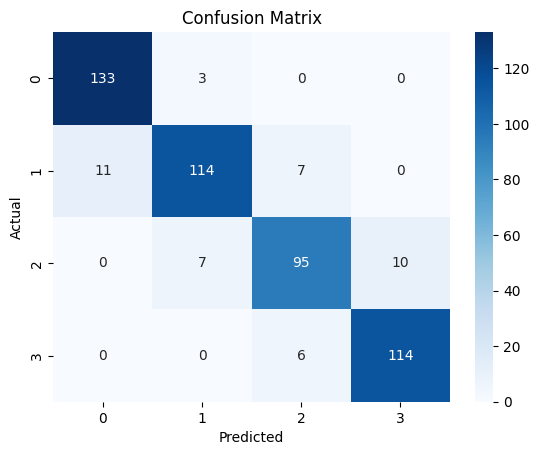

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       136
           1       0.92      0.86      0.89       132
           2       0.88      0.85      0.86       112
           3       0.92      0.95      0.93       120

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [17]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification metrics
print(classification_report(y_test, y_pred))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Second experiment: more neurons + tuned learning rate
tuned_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

tuned_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tuned_history = tuned_model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate tuned model
tuned_loss, tuned_acc = tuned_model.evaluate(X_test, y_test)
print(f"Tuned Model Accuracy: {tuned_acc*100:.2f}%")


Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4024 - loss: 1.3046 - val_accuracy: 0.5967 - val_loss: 1.0437
Epoch 2/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7055 - loss: 0.9115 - val_accuracy: 0.7033 - val_loss: 0.7266
Epoch 3/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8407 - loss: 0.6219 - val_accuracy: 0.8133 - val_loss: 0.5396
Epoch 4/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8995 - loss: 0.4750 - val_accuracy: 0.8333 - val_loss: 0.4285
Epoch 5/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9467 - loss: 0.3290 - val_accuracy: 0.8900 - val_loss: 0.3477
Epoch 6/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9594 - loss: 0.2526 - val_accuracy: 0.8900 - val_loss: 0.3018
Epoch 7/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9714 - loss: 0.2056 - val_accuracy: 0.9000 - val_loss: 0.2612
Epoch 8/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.1714 - val_accuracy: 0.9100 - val_loss: 0.2458
Ep